In [1]:
%cd ..

/home/feodor/Jupyter/depth-poset


In [2]:
import os
import subprocess

import itertools

import numpy as np
import pandas as pd
import pickle as pkl

from matplotlib import pyplot as plt

from src.complexes import CubicalTorusComplexExtended

# Generate 2 complexes to build a homothopy between them

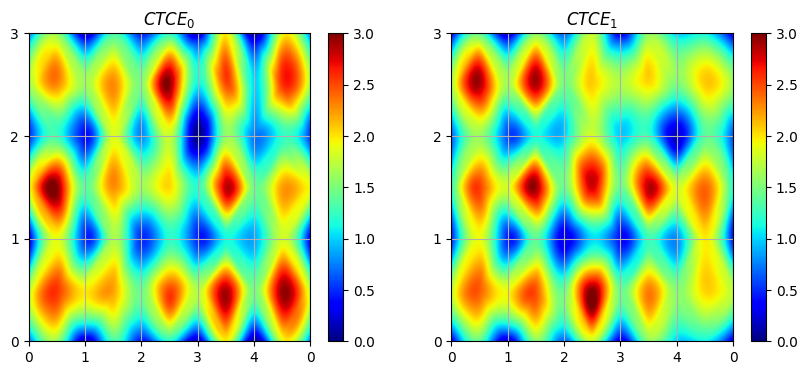

In [3]:
shape = (5, 3)

ctce0 = CubicalTorusComplexExtended(shape).assign_random_barycentric_filtration()
ctce1 = CubicalTorusComplexExtended(shape).assign_random_barycentric_filtration()

fig, axs = plt.subplots(1, 2, figsize=(10, 4))

im0 = ctce0.draw_gradiental(vmin=0, vmax=len(shape) + 1, cmap='jet', ax=axs[0])
im1 = ctce1.draw_gradiental(vmin=0, vmax=len(shape) + 1, cmap='jet', ax=axs[1])
plt.colorbar(im0, ax=axs[0])
plt.colorbar(im1, ax=axs[1])

for i in range(2):
    axs[i].set_title(f'$CTCE_{{{i}}}$')
    axs[i].set_xticks(np.arange(shape[0] + 1), np.arange(shape[0] + 1)%shape[0])
    axs[i].set_yticks(np.arange(shape[1] + 1), np.arange(shape[1] + 1)%shape[0])
    axs[i].grid(True)
plt.show()

In [4]:
directory = 'results/tests/'
if not os.path.exists(directory):
    os.makedirs(directory)

filename_template = 'test-ctce{0}-{1}.pkl'

new_paths = np.array([], dtype=str)
for (i, ctce), j in itertools.product(enumerate([ctce0, ctce1]), 'ab'):
    path = os.path.join(directory, filename_template.format(i, j))
    with open(path, 'wb') as file:
        pkl.dump({'complex': ctce}, file)
    new_paths = np.append(new_paths, path)

print(f'Created {len(new_paths)} new files:\n' + '\n'.join(new_paths))

Created 4 new files:
results/tests/test-ctce0-a.pkl
results/tests/test-ctce0-b.pkl
results/tests/test-ctce1-a.pkl
results/tests/test-ctce1-b.pkl


# Run 2 programs

In [5]:
program_a = 'scripts/calculate_transpositions_during_homotopy_between_extended_cubical_toruses.py'
program_b = 'scripts/calculate_transpositions_during_homotopy_between_extended_cubical_toruses_facilitated.py'

In [6]:
args_a = new_paths[np.char.find(new_paths, 'a') != -1].tolist()
args_b = new_paths[np.char.find(new_paths, 'b') != -1].tolist()
assert len(args_a) == 2
assert len(args_b) == 2
assert (np.char.replace(args_a, 'a', 'x') == np.char.replace(args_b, 'b', 'x')).all()

In [7]:
result_a = subprocess.run(
            ['python', program_a] + args_a,
            capture_output=True,
            text=True)

print(result_a.stdout + result_a.stderr)

The input files are:
path0="results/tests/test-ctce0-a.pkl"
path1="results/tests/test-ctce1-a.pkl"

The indices of the transposing cells have been found and sorted in 0.0036 seconds.
There will be 319 transpositions.
319 transpositions were found in 4.0775 seconds.
So the total duration of seeking transpositions info was 4.0811 seconds.
The depth posets to check scores have been found in 0.0083 seconds.
The similarity score birth_relation_cell_similarity have been found in 0.7798 seconds.
The similarity score death_relation_cell_similarity have been found in 0.7845 seconds.
The similarity score poset_closure_arcs_cell_similarity have been found in 0.7826 seconds.
The similarity score poset_reduction_arcs_cell_similarity have been found in 0.5693 seconds.
So all scores for 319 transpositions have been found in 2.9246 seconds.
The result is saved to path:
results/transpositions-during-linear-homotopy-between-extended-barycentric-cubical-toruses/test-ctce0-a and test-ctce1-a.pkl
The size 

In [8]:
result_b = subprocess.run(
            ['python', program_b] + args_b,
            capture_output=True,
            text=True)

print(result_b.stdout + result_b.stderr)

The input files are:
path0="results/tests/test-ctce0-b.pkl"
path1="results/tests/test-ctce1-b.pkl"

The indices of the transposing cells have been found and sorted in 0.0021 seconds.
There will be 319 transpositions.
0/319 - The similarity score <function birth_relation_cell_similarity at 0x72dd4287c400> have been found in 0.0025 seconds.
0/319 - The similarity score <function death_relation_cell_similarity at 0x72dd4287c540> have been found in 0.0021 seconds.
0/319 - The similarity score <function poset_closure_arcs_cell_similarity at 0x72dd4287c180> have been found in 0.0021 seconds.
0/319 - The similarity score <function poset_reduction_arcs_cell_similarity at 0x72dd4287c2c0> have been found in 0.0021 seconds.
1/319 - The similarity score <function birth_relation_cell_similarity at 0x72dd4287c400> have been found in 0.0021 seconds.
1/319 - The similarity score <function death_relation_cell_similarity at 0x72dd4287c540> have been found in 0.0020 seconds.
1/319 - The similarity score 

In [9]:
def get_result_path(stdout):
    # 
    lines = stdout.split('\n')
    for i, line in enumerate(lines):
        if line == 'The result is saved to path:':
            return lines[i+1]

In [10]:
result_paths = [get_result_path(result.stdout) for result in [result_a, result_b]]

result_paths

['results/transpositions-during-linear-homotopy-between-extended-barycentric-cubical-toruses/test-ctce0-a and test-ctce1-a.pkl',
 'results/transpositions-during-linear-homotopy-between-extended-barycentric-cubical-toruses/test-ctce0-b and test-ctce1-b.pkl']

# Compare 2 Ways to get Transpositions during Homotopies

In [11]:
def load_res(path):
    with open(path, 'rb') as file:
        res = pkl.load(file)
    return res

In [12]:
results = [load_res(path) for path in result_paths]

df0 = results[0]['transpositions']
df1 = results[1]['transpositions']

# check index and columns similarity
assert set(df0.columns.to_list()) == set(df1.columns.to_list())
assert set(df0.index.to_list()) == set(df1.index.to_list())

# check values similarity
assert (df0.sort_index(axis=0).sort_index(axis=1) == df1.sort_index(axis=0).sort_index(axis=1)).all().all()
print('We got 2 similar dataframes!')

We got 2 similar dataframes!


In [13]:
result_times = [res['calculation time'] for res in results]
result_times

[7.092096838001453, 8.56671233400266]

# Clean after

In [14]:
for path in result_paths:
    if os.path.exists(path):
        os.remove(path)
        print(f'Removed file: {path}')
    else:
        print(f'There is no file: {path}')

Removed file: results/transpositions-during-linear-homotopy-between-extended-barycentric-cubical-toruses/test-ctce0-a and test-ctce1-a.pkl
Removed file: results/transpositions-during-linear-homotopy-between-extended-barycentric-cubical-toruses/test-ctce0-b and test-ctce1-b.pkl
